# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis

* Weather gets warmer and warmer as it approches to the equator.
* We don't see significant relationship between latitude and speed.
* We don't see significant relationship between latitude and wind speed. Some cities in the northern hemispheres reach 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=9900)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=9900)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

2291

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Start of Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through every city in the list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#         time.sleep(10)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # For any an error, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is done
print("-----------------------------")
print("Data Retrieval is done      ")
print("-----------------------------")
        
        

Start of Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | henties bay
Processing Record 2 of Set 1 | havre-saint-pierre
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | telemaco borba
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | tselinnoye
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | yulara
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | hofn
Processing Record 16 of Set 1 | rjukan
Processing Record 17 of Set 1 | maracaju
Processing Record 18 of Set 1 | afsin
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | te anau
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | hovd
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()


City          2110
Lat           2110
Lng           2110
Max Temp      2110
Humidity      2110
Cloudiness    2110
Wind Speed    2110
Country       2110
Date          2110
dtype: int64

In [8]:
# show the City_DF
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,henties bay,-22.1160,14.2845,81.00,47,93,1.01,NA,1618611586
1,havre-saint-pierre,50.2334,-63.5986,33.80,69,1,9.22,CA,1618611587
2,punta arenas,-53.1500,-70.9167,44.60,81,40,10.36,CL,1618611587
3,ushuaia,-54.8000,-68.3000,44.60,70,40,23.02,AR,1618611588
4,telemaco borba,-24.3239,-50.6156,66.76,63,87,1.88,BR,1618611588


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2.110000e+03
mean,22.347322,20.126167,60.032275,68.734123,53.101422,7.371043,1.618612e+09
std,29.879177,83.016783,20.439643,24.048294,38.796268,5.272358,2.403168e+02
min,-54.800000,-179.166700,-27.020000,3.000000,0.000000,0.200000,1.618611e+09
25%,-1.028100,-55.904050,44.600000,55.000000,12.000000,3.530000,1.618612e+09
50%,26.564650,24.699050,63.725000,76.000000,59.500000,6.170000,1.618612e+09
75%,47.789675,88.105475,77.000000,87.000000,91.000000,9.910000,1.618612e+09
max,78.218600,179.316700,109.490000,100.000000,100.000000,55.990000,1.618612e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.

Draft_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
Draft_city_data


Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(Draft_city_data, inplace=False)
clean_city_data.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,henties bay,-22.1160,14.2845,81.00,47,93,1.01,NA,1618611586
1,havre-saint-pierre,50.2334,-63.5986,33.80,69,1,9.22,CA,1618611587
2,punta arenas,-53.1500,-70.9167,44.60,81,40,10.36,CL,1618611587
3,ushuaia,-54.8000,-68.3000,44.60,70,40,23.02,AR,1618611588
4,telemaco borba,-24.3239,-50.6156,66.76,63,87,1.88,BR,1618611588


In [13]:
# Extract relevant fields from the data frame

lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv

clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

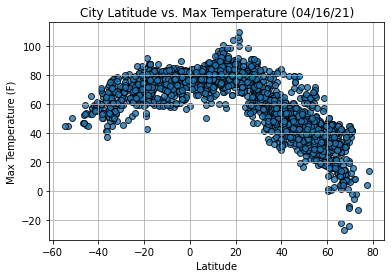

In [14]:
# Create scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

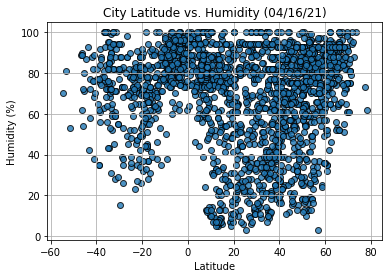

In [15]:
# Create the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

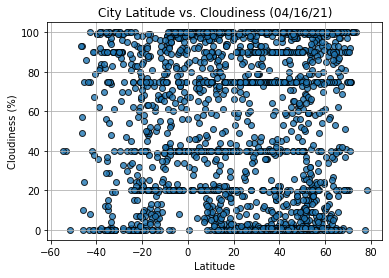

In [16]:
# Create the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

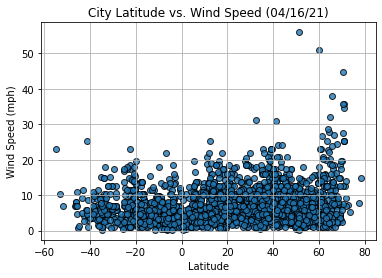

In [17]:
#Create the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


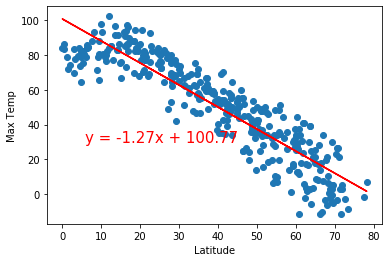

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


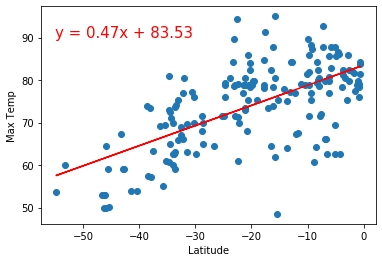

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


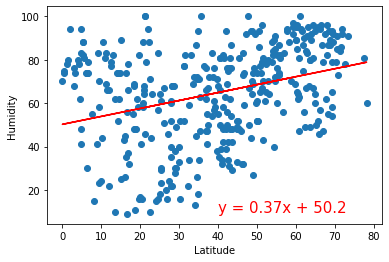

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


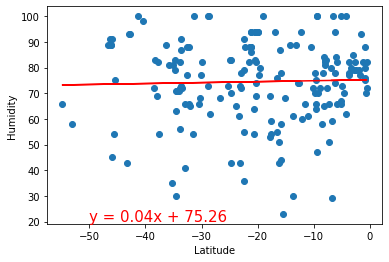

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


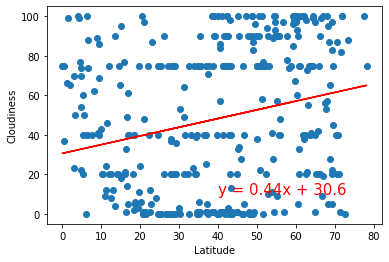

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


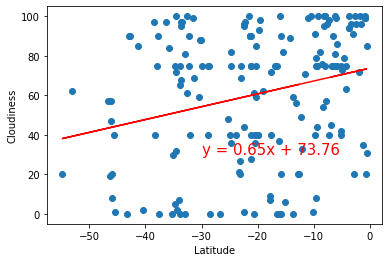

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


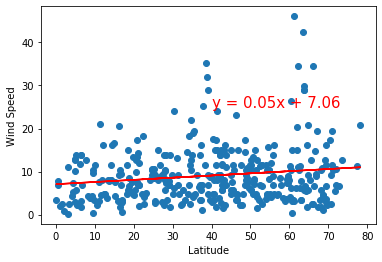

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


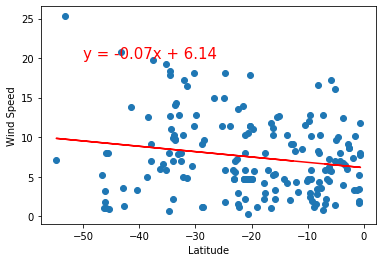